# Lección 9: Intro Regresión Lineal

### Ejercicios de pair programming 25 de enero.

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

-Deberéis separar la X y la y.

-Deberéis crear el train y el test.

-Ajustar vuestro modelo.

In [29]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [30]:
# Abrimos nuestro DataFrame
df = pd.read_csv("archive/encoding.csv", index_col = 0)
df.reset_index(inplace = True)
df.head()


,region,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual,...,region_Australia and New Zealand,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
0,Western Europe,-0.993631,7.587,0.667797,1.184471,0.817892,1.142818,2.674027,0.488939,0.450617,...,0,0,0,0,0,0,0,0,0,1
1,Western Europe,-0.980892,7.561,0.519256,1.336192,0.835310,0.976182,0.301121,1.360830,0.722398,...,0,0,0,0,0,0,0,0,0,1
2,Western Europe,-0.968153,7.527,0.555780,1.216329,0.636395,1.069507,3.217869,0.767717,0.413316,...,0,0,0,0,0,0,0,0,0,1
3,Western Europe,-0.955414,7.522,0.766346,1.131058,0.665118,1.161655,2.207255,0.802712,0.373969,...,0,0,0,0,0,0,0,0,0,1
4,North America,-0.942675,7.427,0.557057,1.107057,0.720608,0.995200,1.904941,1.497125,0.354023,...,0,0,0,0,0,1,0,0,0,0


In [31]:
df.drop(["region", "region.1"], axis = 1, inplace = True)

In [32]:
df.isnull().sum()

happiness_rank                            0
happiness_score                           0
economy                                   0
family                                    0
health                                    0
freedom                                   0
trust                                     0
generosity                                0
dystopia_residual                         0
region_Australia and New Zealand          0
region_Central and Eastern Europe         0
region_Eastern Asia                       0
region_Latin America and Caribbean        0
region_Middle East and Northern Africa    0
region_North America                      0
region_Southeastern Asia                  0
region_Southern Asia                      0
region_Sub-Saharan Africa                 0
region_Western Europe                     0
dtype: int64

In [33]:
X = df.drop("happiness_score", axis = 1)
y = df["happiness_score"]

In [34]:
X.head()

,happiness_rank,economy,family,health,freedom,trust,generosity,dystopia_residual,region_Australia and New Zealand,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
0,-0.993631,0.667797,1.184471,0.817892,1.142818,2.674027,0.488939,0.450617,0,0,0,0,0,0,0,0,0,1
1,-0.980892,0.519256,1.336192,0.835310,0.976182,0.301121,1.360830,0.722398,0,0,0,0,0,0,0,0,0,1
2,-0.968153,0.555780,1.216329,0.636395,1.069507,3.217869,0.767717,0.413316,0,0,0,0,0,0,0,0,0,1
3,-0.955414,0.766346,1.131058,0.665118,1.161655,2.207255,0.802712,0.373969,0,0,0,0,0,0,0,0,0,1
4,-0.942675,0.557057,1.107057,0.720608,0.995200,1.904941,1.497125,0.354023,0,0,0,0,0,1,0,0,0,0


In [35]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: happiness_score, dtype: float64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
lr = LinearRegression(n_jobs=-1)

In [38]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para las casas que tenemos en los datos de test

In [40]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
221,5.743,5.742912,Train
132,4.252,4.252016,Train
155,3.006,3.006354,Train
94,4.959,4.959398,Train
245,5.161,5.161057,Train


In [41]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
221,5.743,5.742912,Train,0.000088
132,4.252,4.252016,Train,-0.000016
155,3.006,3.006354,Train,-0.000354
94,4.959,4.959398,Train,-0.000398
245,5.161,5.161057,Train,-0.000057


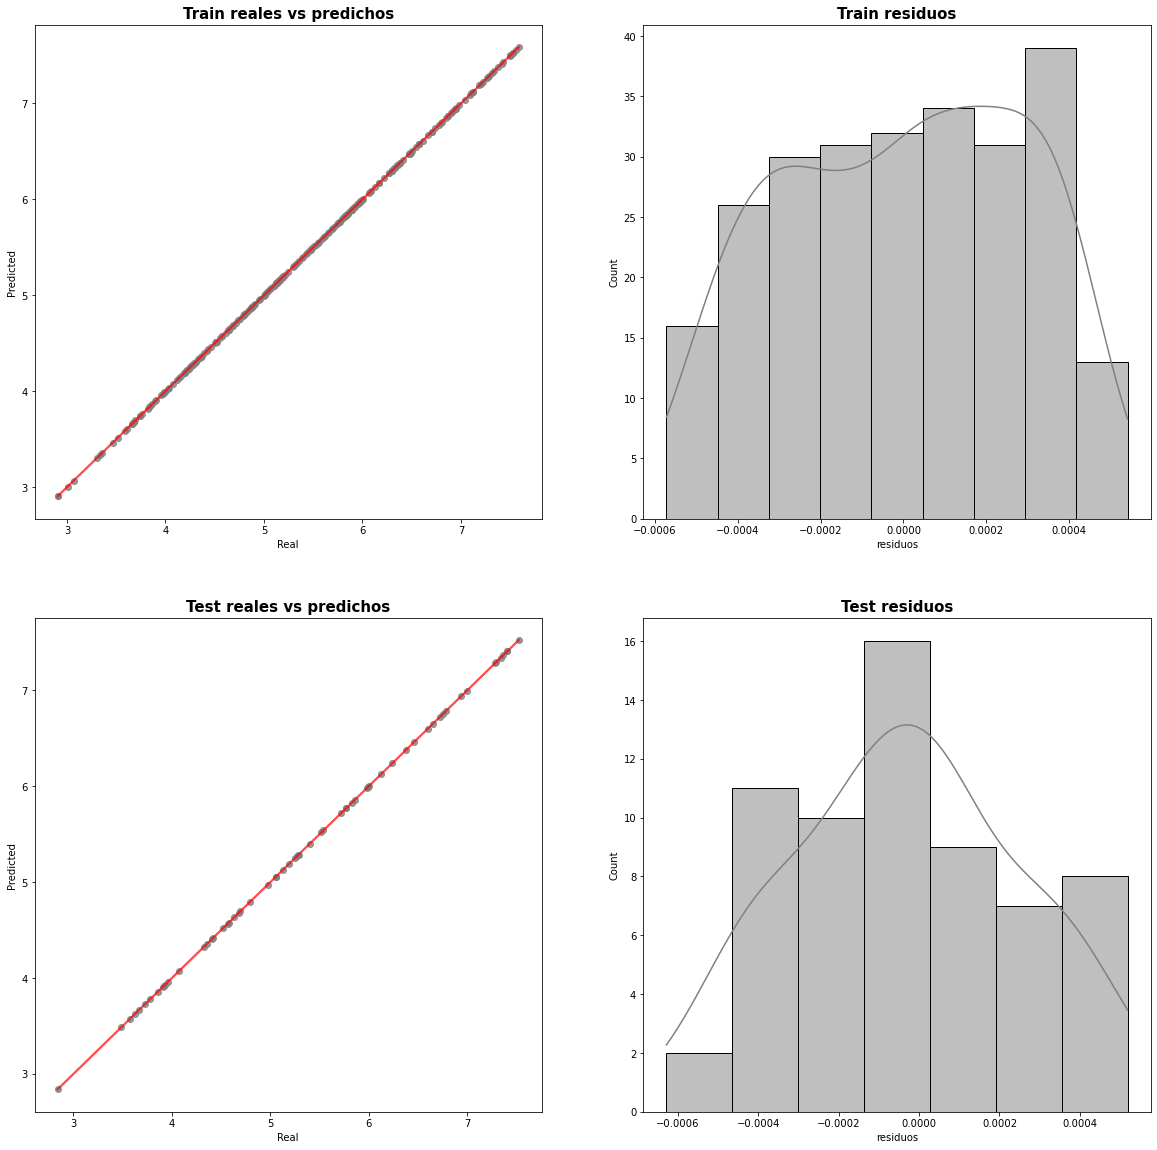

In [42]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");